# Linear Regression with Python Scikit Learn

***TASK 2: PREDICTION USING SUPERVISED MACHINE LEARNING***

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.


**PROBLEM STATEMENT:** To predict the percentage of marks of the student based on the number of study hours. This is a simple linear regression takes which involves just two variables. You can use Python/R/SAS or any other tool.

What will be predicted score if a student study for 9.25 hours in a day?

# **AUTHOR: NAVDEEP DHIMAN**

# Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Reading data

In [4]:
df = pd.read_csv("C:\\Users\\navde\\OneDrive\\Documents\\grip\\data2.csv")
df.head(8)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [15]:
df.shape

(25, 2)

# Data Exploration

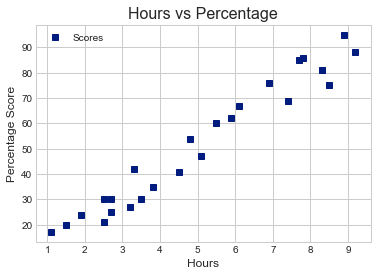

In [24]:
#Plotting the distribution of scores
from matplotlib import style
style.use('seaborn-dark-palette')
df.plot(x='Hours',y='Scores',style='s')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage Score')
plt.show()

In [20]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


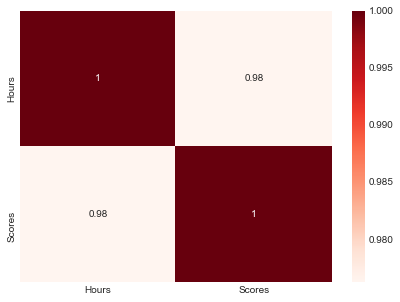

In [25]:
import seaborn as sns
plt.figure(figsize=(7,5))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

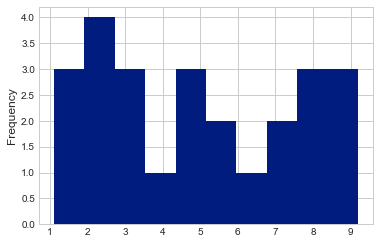

In [26]:
df["Hours"].plot.hist()
plt.show()

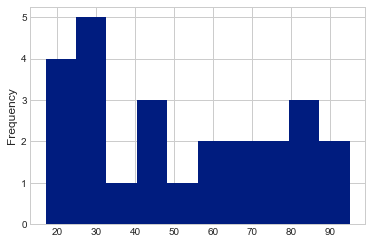

In [33]:
df["Scores"].plot.hist()
plt.show()

<AxesSubplot:xlabel='Hours'>

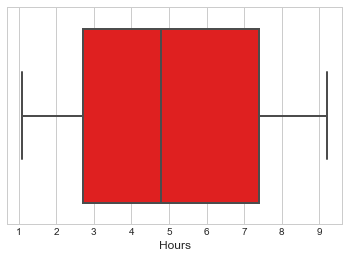

In [37]:
sns.boxplot(x = "Hours", data = df,color="red")

<AxesSubplot:xlabel='Scores'>

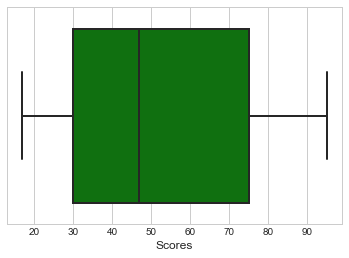

In [38]:
sns.boxplot(x = "Scores", data = df,color="green")

 This graph is showing us the linear relationship between the number of hours studied by student and the percentage of scores.

# Prediction

In [33]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [37]:
#split the data into train and test set
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)


# Training the model

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

print("Training complete")

Training complete


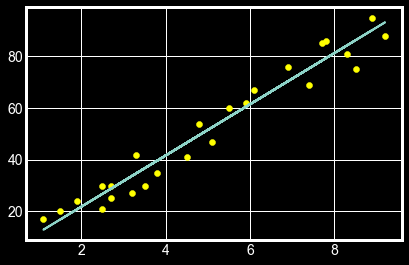

In [43]:
#Plotting best fit line
line = regressor.coef_*X + regressor.intercept_
plt.scatter(X,y,color = "yellow")
plt.plot(X,line)
plt.show()

# Predictions

In [49]:
#Time to test our model or regressor
y_pred = regressor.predict(x_test)
print(y_pred)
# print(x_test)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [47]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


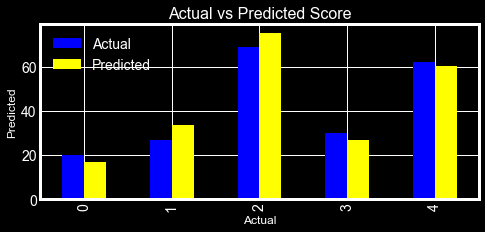

In [51]:
df.plot(kind='bar', figsize=(7,3),color=["blue","yellow"])
plt.title('Actual vs Predicted Score')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend(["Actual","Predicted"])
plt.show()

In [53]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print('predicted score if a student studies for 9.25 hrs/ day:\n',own_pred[0])



predicted score if a student studies for 9.25 hrs/ day:
 93.69173248737535


In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared error: ', mean_squared_error(y_test, y_pred))
print('r2 score: ', r2_score(y_test, y_pred))

Mean absolute error:  4.183859899002975
Mean Squared error:  21.598769307217406
r2 score:  0.9454906892105355
